In [1]:
import warnings
warnings.filterwarnings('ignore')

TARGET = 'res-resist'
DISCOVERY_TIMEOUT_SECONDS=2800
ESTIMATION_TIMEOUT_SECONDS=1800
REFUTATION_GLOBAL_TIMEOUT_SECONDS=1800
REFUTATION_MODEL_TIMEOUT_SECONDS=240

# Dataset and Knowledge settings

In [2]:
import pandas as pd

df = pd.read_csv('./resources/yacht_hydrodynamics/data.csv')
df

,cent-boy,prismatic,len-disp,beam-draught,len-beam,froude,res-resist
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
...,...,...,...,...,...,...,...
303,-2.3,0.600,4.34,4.23,2.73,0.350,8.47
304,-2.3,0.600,4.34,4.23,2.73,0.375,12.27
305,-2.3,0.600,4.34,4.23,2.73,0.400,19.59
306,-2.3,0.600,4.34,4.23,2.73,0.425,30.48


In [3]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cent-boy      308 non-null    float64
 1   prismatic     308 non-null    float64
 2   len-disp      308 non-null    float64
 3   beam-draught  308 non-null    float64
 4   len-beam      308 non-null    float64
 5   froude        308 non-null    float64
 6   res-resist    308 non-null    float64
dtypes: float64(7)
memory usage: 17.0 KB


None

,cent-boy,prismatic,len-disp,beam-draught,len-beam,froude,res-resist
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


In [4]:
from causal_nest.knowledge import parse_knowledge_file

knowledge = parse_knowledge_file('./resources/yacht_hydrodynamics/knowledge.txt')
knowledge

Knowledge(required_edges=[('froude', 'res-resist')], forbidden_edges=[('res-resist', 'cent-boy'), ('len-disp', 'len-beam'), ('res-resist', 'prismatic'), ('res-resist', 'len-disp'), ('res-resist', 'froude'), ('res-resist', 'beam-draught'), ('cent-boy', 'froude'), ('len-disp', 'prismatic'), ('beam-draught', 'prismatic'), ('beam-draught', 'froude'), ('cent-boy', 'prismatic'), ('len-disp', 'froude'), ('res-resist', 'len-beam'), ('cent-boy', 'len-beam'), ('beam-draught', 'len-beam')])

In [5]:
from causal_nest.dataset import MissingDataHandlingMethod, Dataset, handle_missing_data, FeatureTypeMap, FeatureType, estimate_feature_importances

feature_mapping = [FeatureTypeMap(feature=c, type=FeatureType.CONTINUOUS) for c in df.drop([TARGET], axis=1).columns]

dataset = Dataset(data=df, target=TARGET, feature_mapping=feature_mapping)
dataset = handle_missing_data(dataset, MissingDataHandlingMethod.FORWARD_FILL)
dataset = estimate_feature_importances(dataset)
dataset

Dataset(data=     cent-boy  prismatic  len-disp  beam-draught  len-beam  froude  res-resist
0        -2.3      0.568      4.78          3.99      3.17   0.125        0.11
1        -2.3      0.568      4.78          3.99      3.17   0.150        0.27
2        -2.3      0.568      4.78          3.99      3.17   0.175        0.47
3        -2.3      0.568      4.78          3.99      3.17   0.200        0.78
4        -2.3      0.568      4.78          3.99      3.17   0.225        1.18
..        ...        ...       ...           ...       ...     ...         ...
303      -2.3      0.600      4.34          4.23      2.73   0.350        8.47
304      -2.3      0.600      4.34          4.23      2.73   0.375       12.27
305      -2.3      0.600      4.34          4.23      2.73   0.400       19.59
306      -2.3      0.600      4.34          4.23      2.73   0.425       30.48
307      -2.3      0.600      4.34          4.23      2.73   0.450       46.66

[308 rows x 7 columns], target='res-re

In [6]:
from causal_nest.problem import Problem

problem = Problem(dataset=dataset, description='Yacht Hydrodynamics', knowledge=knowledge)
problem

Problem(dataset=Dataset(data=     cent-boy  prismatic  len-disp  beam-draught  len-beam  froude  res-resist
0        -2.3      0.568      4.78          3.99      3.17   0.125        0.11
1        -2.3      0.568      4.78          3.99      3.17   0.150        0.27
2        -2.3      0.568      4.78          3.99      3.17   0.175        0.47
3        -2.3      0.568      4.78          3.99      3.17   0.200        0.78
4        -2.3      0.568      4.78          3.99      3.17   0.225        1.18
..        ...        ...       ...           ...       ...     ...         ...
303      -2.3      0.600      4.34          4.23      2.73   0.350        8.47
304      -2.3      0.600      4.34          4.23      2.73   0.375       12.27
305      -2.3      0.600      4.34          4.23      2.73   0.400       19.59
306      -2.3      0.600      4.34          4.23      2.73   0.425       30.48
307      -2.3      0.600      4.34          4.23      2.73   0.450       46.66

[308 rows x 7 columns]

## Checking the Feature infered importance

In [7]:
problem.dataset.feature_mapping

[FeatureTypeMap(feature='froude', type=<FeatureType.CONTINUOUS: 3>, importance=0.9898285781622718),
 FeatureTypeMap(feature='prismatic', type=<FeatureType.CONTINUOUS: 3>, importance=0.00520351867587876),
 FeatureTypeMap(feature='beam-draught', type=<FeatureType.CONTINUOUS: 3>, importance=0.002194811295714864),
 FeatureTypeMap(feature='cent-boy', type=<FeatureType.CONTINUOUS: 3>, importance=0.0017663069411723061),
 FeatureTypeMap(feature='len-disp', type=<FeatureType.CONTINUOUS: 3>, importance=0.0005409374399111927),
 FeatureTypeMap(feature='len-beam', type=<FeatureType.CONTINUOUS: 3>, importance=0.0004658474850510902)]

# Causal Discovery

In [8]:
from causal_nest.discovery import applyable_models

models = applyable_models(problem)
models

[causal_nest.discovery_models.pc.PC,
 causal_nest.discovery_models.gs.GS,
 causal_nest.discovery_models.ccdr.CCDR,
 causal_nest.discovery_models.iamb.IAMB,
 causal_nest.discovery_models.sam.SAM,
 causal_nest.discovery_models.bes.BES,
 causal_nest.discovery_models.grasp.GRASP,
 causal_nest.discovery_models.cgnn.CGNN]

In [9]:
from causal_nest.discovery import discover_with_all_models

problem = discover_with_all_models(problem, max_seconds_model=DISCOVERY_TIMEOUT_SECONDS)
problem.discovery_results

GRaSP edge count: 5    

  0%|          | 0/1000 [00:00<?, ?it/s]


GRaSP completed in: 0.36s 


 15%|█▍        | 146/1000 [01:13<05:21,  2.65it/s, disc=-.0747, gen=-.11, regul_loss=1.17, tot=-5.96] 

{'PC': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffa1a3cee0>, model='PC', auc_pr=None, shd=None, sid=None, runtime=33.4376128379954, priority_score=0.0, knowledge_integrity_score=1.0, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=1.0),
 'GS': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffa1a3c940>, model='GS', auc_pr=None, shd=None, sid=None, runtime=4.714150523999706, priority_score=0.0, knowledge_integrity_score=0.8666666666666667, forbidden_edges_violation_rate=0.13333333333333333, required_edges_compliance_rate=1.0),
 'CCDR': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffa1a3cd60>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=10.599942294997163, priority_score=0.0, knowledge_integrity_score=0.8666666666666667, forbidden_edges_violation_rate=0.13333333333333333, required_edges_compliance_rate=1.0),
 'IAMB': DiscoveryResult(output_graph=<networkx.classes

In [10]:
list(sorted(filter(lambda x: x, problem.discovery_results.values()), key=lambda x: x.priority_score, reverse=True))

[DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffa1a3c4f0>, model='BES', auc_pr=None, shd=None, sid=None, runtime=0.4364763860066887, priority_score=0.4081632653061224, knowledge_integrity_score=0.0, forbidden_edges_violation_rate=0.2, required_edges_compliance_rate=0.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffa1a3cee0>, model='PC', auc_pr=None, shd=None, sid=None, runtime=33.4376128379954, priority_score=0.0, knowledge_integrity_score=1.0, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=1.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffa1a3c940>, model='GS', auc_pr=None, shd=None, sid=None, runtime=4.714150523999706, priority_score=0.0, knowledge_integrity_score=0.8666666666666667, forbidden_edges_violation_rate=0.13333333333333333, required_edges_compliance_rate=1.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffa1a3cd60>, m

# Causal Estimation

In [11]:
from causal_nest.estimation import estimate_all_effects

problem = estimate_all_effects(problem, verbose=True, max_seconds_model=ESTIMATION_TIMEOUT_SECONDS)
problem.estimation_results

{'BES': [EstimationResult(model='BES', treatment='froude', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13746580>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff137467f0>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='BES', treatment='prismatic', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13746b20>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff1375f3a0>, control_value=0, treatment_value=1, p_value=array([0.61746287])),
  EstimationResult(model='BES', treatment='beam-draught', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff1375fe50>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff1375feb0>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='BES', treatment='cent-boy', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object a

In [12]:
for m, er in problem.estimation_results.items():
    print('\n\n\nModel: ', m)
    for r in er:
        print(r.treatment, ': ', r.estimate.value)




Model:  BES
froude :  0
prismatic :  -18.59689851383946
beam-draught :  0
cent-boy :  0.19342278824120207
len-disp :  -0.17777295324662212
len-beam :  0



Model:  PC
froude :  121.66757242757237
prismatic :  0
beam-draught :  0
cent-boy :  0
len-disp :  0
len-beam :  0



Model:  GS
froude :  121.66757242757237
prismatic :  0
beam-draught :  0
cent-boy :  0
len-disp :  0
len-beam :  0



Model:  CCDR
froude :  121.6675724275724
prismatic :  -18.596898513839278
beam-draught :  0
cent-boy :  0
len-disp :  0
len-beam :  0



Model:  IAMB
froude :  121.66757242757237
prismatic :  0
beam-draught :  0
cent-boy :  0
len-disp :  0
len-beam :  0



Model:  GRASP
froude :  121.66757242757237
prismatic :  0
beam-draught :  0
cent-boy :  0
len-disp :  0
len-beam :  0


# Refutation

In [13]:
from causal_nest.refutation import refute_all_results

problem = refute_all_results(problem, max_seconds_global=REFUTATION_GLOBAL_TIMEOUT_SECONDS, max_seconds_model=REFUTATION_MODEL_TIMEOUT_SECONDS)
problem.refutation_results

e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscr

{'BES': [RefutationResult(treatment='cent-boy', estimated_effect=0.19342278824120207, p_value=0.94, new_effect=0.006727335388658124, model='PlaceboPermute', runtime=16.104510181990918, passed=True),
  RefutationResult(treatment='cent-boy', estimated_effect=0.19342278824120207, p_value=0.8, new_effect=0.18478856097441893, model='RandomCommonCause', runtime=24.47736472899851, passed=True),
  RefutationResult(treatment='cent-boy', estimated_effect=0.19342278824120207, p_value=0.8999999999999999, new_effect=0.22544232497997116, model='SubsetRemoval', runtime=44.00050069899589, passed=True),
  RefutationResult(treatment='len-disp', estimated_effect=-0.17777295324662212, p_value=1.0, new_effect=0.12258940449714992, model='PlaceboPermute', runtime=15.98952470200311, passed=True),
  RefutationResult(treatment='len-disp', estimated_effect=-0.17777295324662212, p_value=0.94, new_effect=-0.17546567584576528, model='RandomCommonCause', runtime=30.67097645199101, passed=True),
  RefutationResult(tr

# Output Graphs

In [14]:
from causal_nest.result import generate_all_results


graphs = generate_all_results(problem)
graphs

{'PC': 'digraph G {\nfontname="Helvetica,Arial,sans-serif";\nnode[style="filled", fontsize=20, penwidth=2.5, fixedsize=true, fontcolor="black", fillcolor="gray", color="black", shape="circle"];\nedge[penwidth=2, minlen=2];\nsplines="polyline";\n   "froude"[width=1, height=1, label="froude\n121.67", fillcolor="#4CAF50", fontcolor="white"];\n   "prismatic"[width=1, height=1, label="prismatic\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "beam-draught"[width=1, height=1, label="beam-draught\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "cent-boy"[width=1, height=1, label="cent-boy\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "len-disp"[width=1, height=1, label="len-disp\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgra

PC


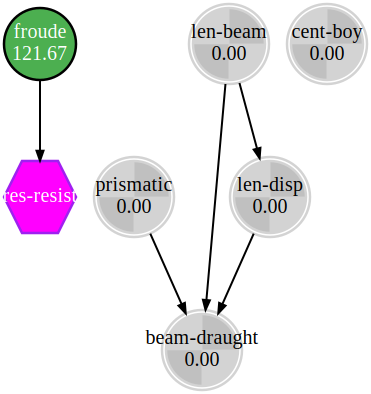

GS


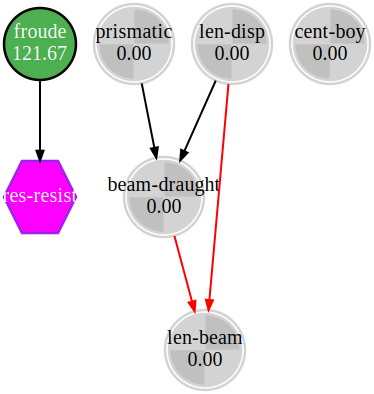

CCDR


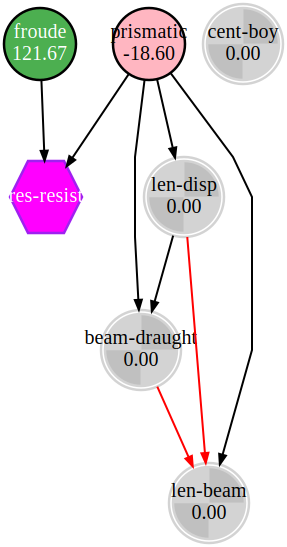

IAMB


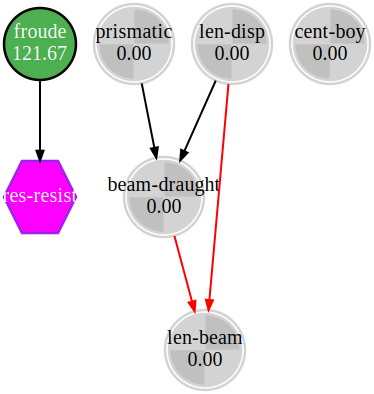

SAM
No graph
BES


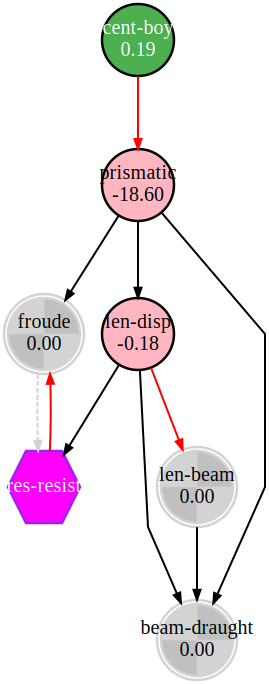

GRASP


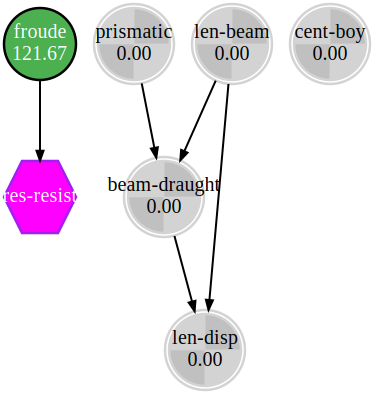

CGNN
No graph


In [15]:
from graphviz import Source

for k, v in graphs.items():
    print(k)

    if v is None: 
        print('No graph')
    else:
        display(Source(v))